In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [4]:
df_energy = pd.read_csv('./data/prepared/df_energy_2020.csv')

## Overview of each figure

In [21]:
df_energy[['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].describe()

,nuclear_power,not_renewable,renewable,energy_price
count,35136.000000,35136.000000,35136.000000,35136.000000
mean,6934.673246,33765.069651,27962.757734,30.471738
std,969.703507,11159.545300,12106.069379,17.501029
min,3739.551000,11985.471000,7809.697000,-83.940000
25%,6450.204500,25593.516000,18140.908750,21.750000
50%,6793.422000,32771.112000,26610.473500,30.990000
75%,7834.915000,39948.887250,36752.224000,40.250000
max,8185.779000,68966.183000,69026.970000,200.040000


#### What does it mean when energy price reached minus?
Negative electricity prices (or very low electricity prices) occur in wholesale trading when there is a surplus of electricity. Or, in other words, when electricity generation exceeds electricity consumption. Such a situation arises, among other things, when there is a very high feed-in of very low-priced electricity from wind, as is the case at the moment.
<br />
[General information about energy price](https://www.enbw.com/energie-entdecken/energiewirtschaft-und-politik/energiewirtschaft/strommarkt.html)

## Correlation between the key figures 

In [6]:
df_energy.loc[:,['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].corr()

,nuclear_power,not_renewable,renewable,energy_price
nuclear_power,1.000000,0.407680,-0.135737,0.372776
not_renewable,0.407680,1.000000,-0.459684,0.796859
renewable,-0.135737,-0.459684,1.000000,-0.512600
energy_price,0.372776,0.796859,-0.512600,1.000000


- Renewable energy has a **negative** correlation to energy price
- Not renewable energy has a **strong** correlation to energy price

## Analysis - Day of week

### Day of week and Energy Price

## Overview of key figures grouped by day of week

In [10]:
df_energy['datetime'] = pd.to_datetime(df_energy['datetime'])
df_energy['dayofweek'] = df_energy['datetime'].dt.day_of_week
grp_day_of_week = df_energy.groupby(['dayofweek'])

In [14]:
grp_day_of_week['energy_price'].describe()

,count,mean,std,min,25%,50%,75%,max
dayofweek,,,,,,,,
0,4992.0,32.391106,18.979678,-78.15,22.6125,33.365,43.2925,200.04
1,4992.0,33.767548,18.152121,-83.94,24.2775,33.000,42.4600,189.25
2,5088.0,35.137555,15.999207,-29.98,25.5375,33.785,43.2300,114.00
3,5088.0,35.097586,14.358696,-1.58,25.7650,34.040,43.1850,110.13
4,4992.0,33.382268,13.440421,-8.77,24.9200,33.595,41.2525,106.35
5,4992.0,25.210457,12.838657,-11.16,17.1250,26.260,34.0000,58.00
6,4992.0,18.136963,20.075361,-74.97,7.5700,21.445,32.0100,58.97


(0: Monday - 6: Sunday)
<br/>
- Energy price on weekend are lower than on weekdays
- Mean and median are almost the same -> the prices are more or less evenly distributed from the lowest to highest price

#### Box plot of energy price by day of week

<AxesSubplot: xlabel='dayofweek', ylabel='energy_price'>

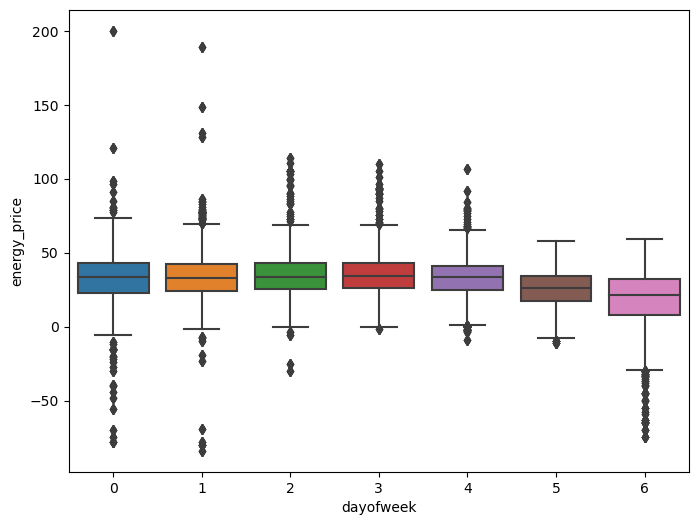

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy['dayofweek'], 
    y=df_energy['energy_price'] 
    )

- Weekdays don't seem to have a crutial influence on the energy price.
- Energy price tends to decrease slightly on weekends.
- Energy price on Saturday seem to be most stable.
<br />
[Article about the relation between energy cost and day of week](https://www.finanztip.de/stromtarife/variable-stromtarife/)

### Day of week and energy feeding volume
This analysis was done to analyse the reason of lower energy prices on weekends.

In [24]:
df_energy['total_feeding_volume'] = df_energy['renewable'] + df_energy['nuclear_power'] + df_energy['not_renewable']

In [27]:
df_energy_reshape = df_energy.melt(['datetime', 'dayofweek', 'energy_price', 'date', 'hour', 'month'], var_name='type_of_power', value_name='feeding_volume')

<AxesSubplot: xlabel='type_of_power', ylabel='feeding_volume'>

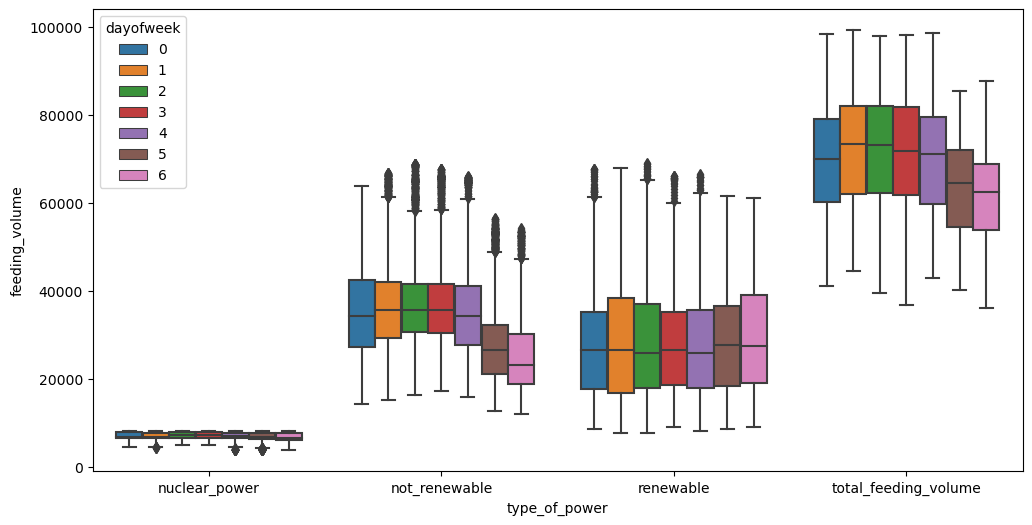

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_energy_reshape,
    x='type_of_power',
    y='feeding_volume',
    hue='dayofweek',
)

- No significant differences on feeding volume of nuclear power and renewable energy per day of week
- Feeding volume of not renewable energy is considerably less (by about 10.000 MW)
#### Our Assumption
Total feeding volume of renewable energy is the same also on weekends, but the demand is less (refer to the article above), so that the feeding volume of not renewable energy becomes lower, which leads to the lower price.